<a href="https://colab.research.google.com/github/salochaud/aprendizajeautomatico/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import pearsonr

plt.rcParams["figure.figsize"] = (8,5)

df = pd.read_csv("/content/gym_members_exercise_tracking.csv")

display(df.head())
print(df.columns)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')


In [2]:
rename_columns = {
    "Weight (kg)": "Weight_kg",
    "Height (m)": "Height_m",
    "Session_Duration (hours)": "Session_Duration_h",
    "Water_Intake (liters)": "Water_Intake_l",
    "Workout_Frequency (days/week)": "Workout_Frequency"
}

df = df.rename(columns=rename_columns)

display(df.head())
print(df.columns)

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_h,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_l,Workout_Frequency,Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Index(['Age', 'Gender', 'Weight_kg', 'Height_m', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration_h', 'Calories_Burned', 'Workout_Type',
       'Fat_Percentage', 'Water_Intake_l', 'Workout_Frequency',
       'Experience_Level', 'BMI'],
      dtype='object')


In [3]:
vars_interes = ["Age", "BMI", "Calories_Burned", "Workout_Frequency", "Water_Intake_l"]
data = df[vars_interes].copy()

print("Información de las variables seleccionadas:\n")
display(data.info())

print("\nEstadísticos descriptivos básicos:")
display(data.describe())

print("\nVarianzas:")
display(data.var())

print("\nModa:")
display(data.mode())

print("\nMediana:")
display(data.median())

Información de las variables seleccionadas:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                973 non-null    int64  
 1   BMI                973 non-null    float64
 2   Calories_Burned    973 non-null    float64
 3   Workout_Frequency  973 non-null    int64  
 4   Water_Intake_l     973 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 38.1 KB


None


Estadísticos descriptivos básicos:


,Age,BMI,Calories_Burned,Workout_Frequency,Water_Intake_l
count,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,24.912127,905.422405,3.321686,2.626619
std,12.180928,6.660879,272.641516,0.913047,0.600172
min,18.000000,12.320000,303.000000,2.000000,1.500000
25%,28.000000,20.110000,720.000000,3.000000,2.200000
50%,40.000000,24.160000,893.000000,3.000000,2.600000
75%,49.000000,28.560000,1076.000000,4.000000,3.100000
max,59.000000,49.840000,1783.000000,5.000000,3.700000



Varianzas:


,0
Age,148.375004
BMI,44.367314
Calories_Burned,74333.396493
Workout_Frequency,0.833655
Water_Intake_l,0.360206



Moda:


,Age,BMI,Calories_Burned,Workout_Frequency,Water_Intake_l
0,43.0,23.53,883.0,3.0,3.5
1,NaN,NaN,1025.0,NaN,NaN



Mediana:


,0
Age,40.00
BMI,24.16
Calories_Burned,893.00
Workout_Frequency,3.00
Water_Intake_l,2.60



### Age ###


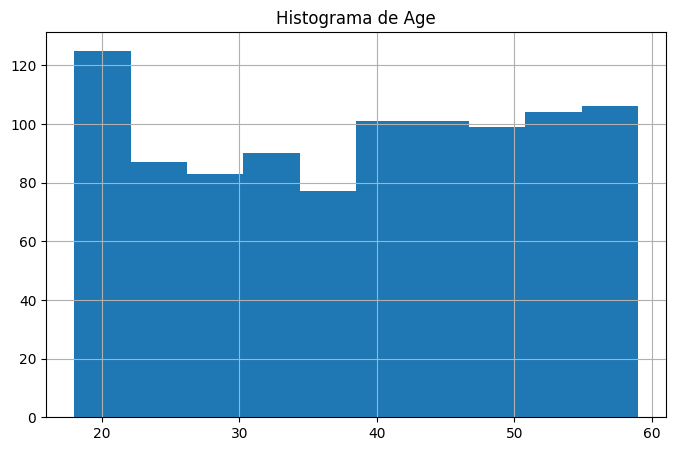

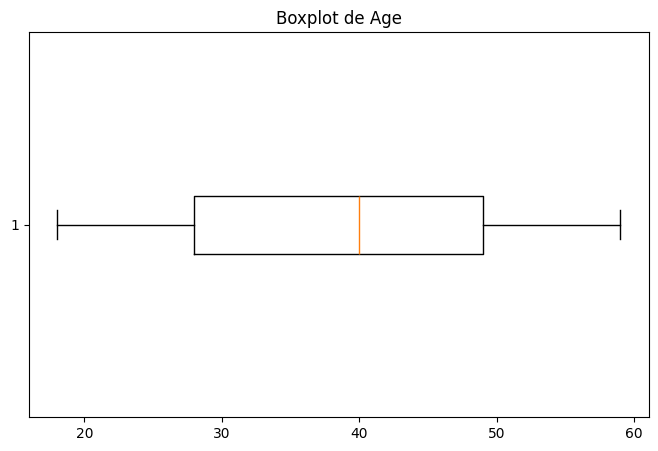

<Figure size 800x500 with 0 Axes>

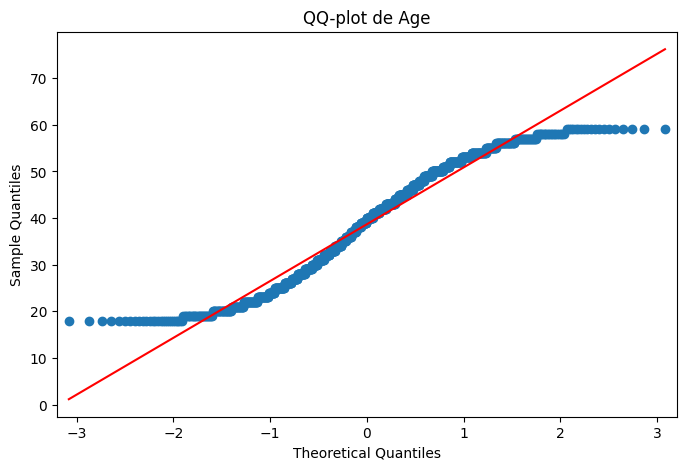


### BMI ###


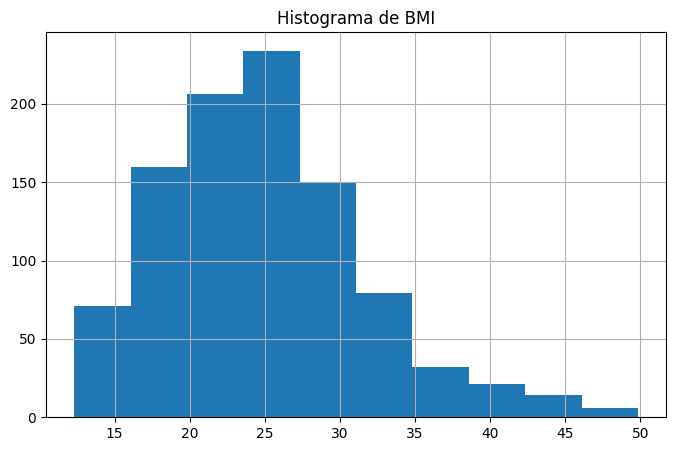

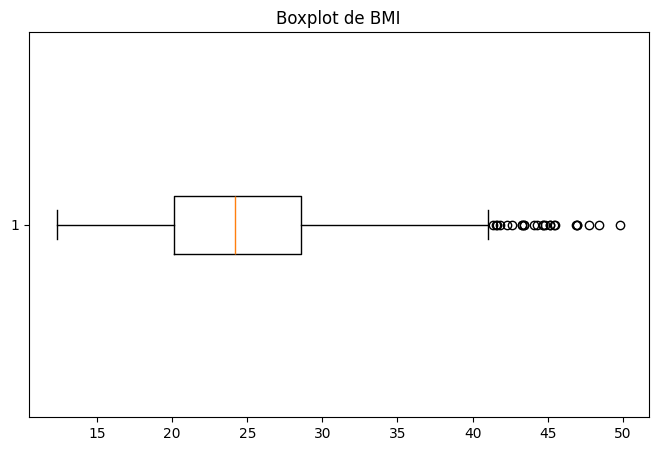

<Figure size 800x500 with 0 Axes>

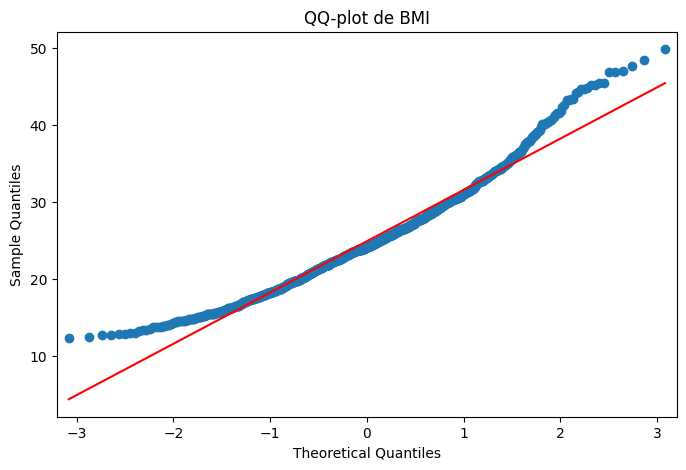


### Calories_Burned ###


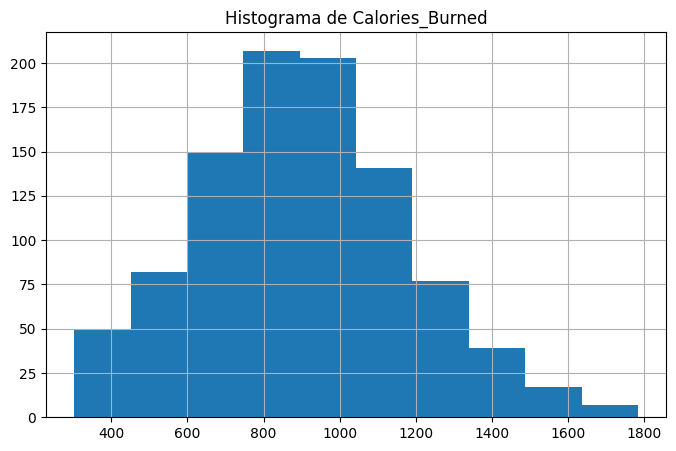

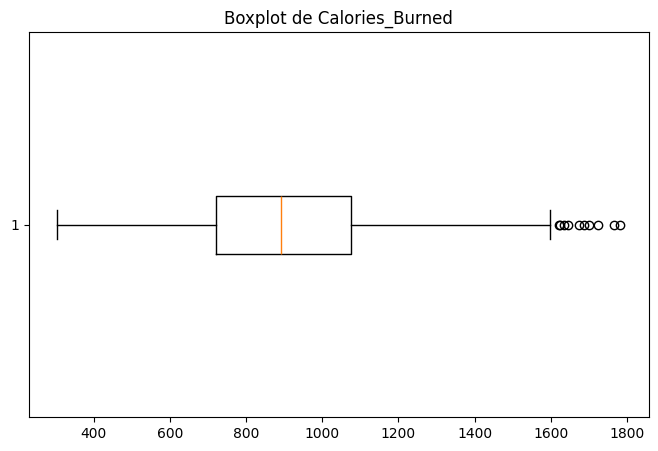

<Figure size 800x500 with 0 Axes>

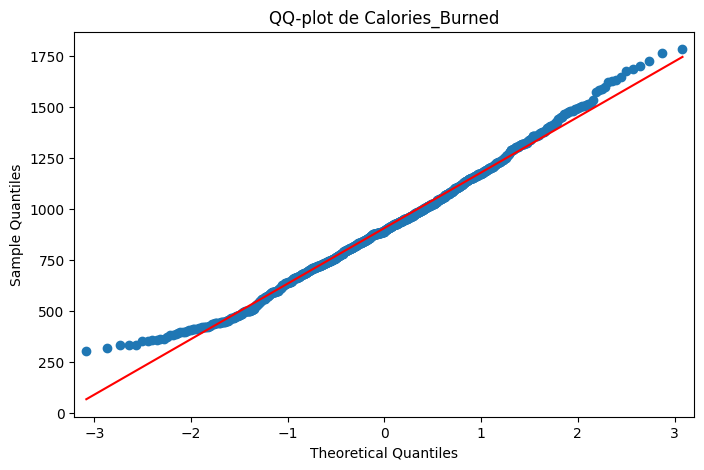


### Workout_Frequency ###


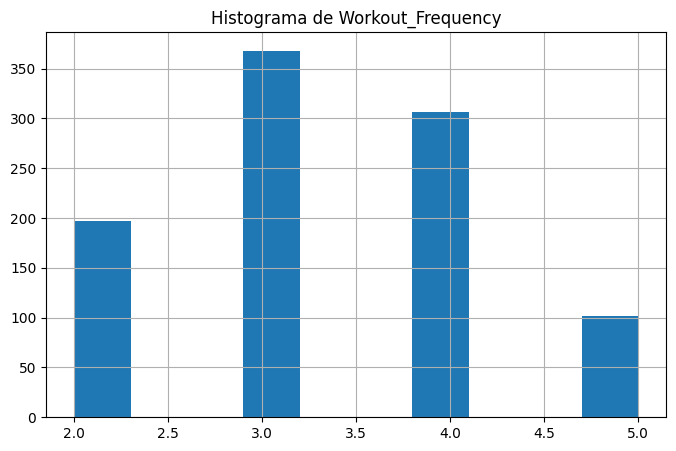

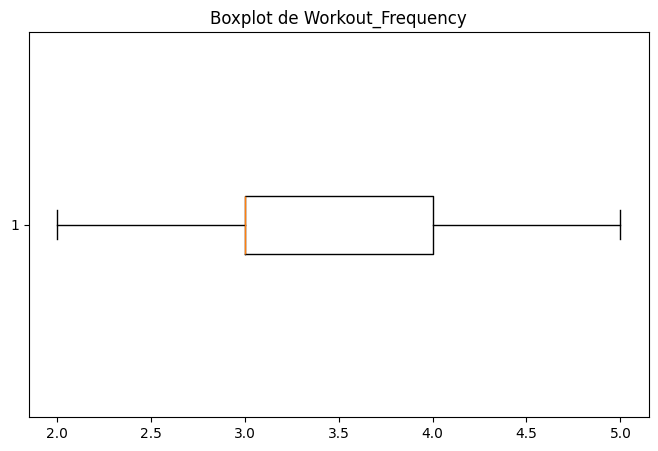

<Figure size 800x500 with 0 Axes>

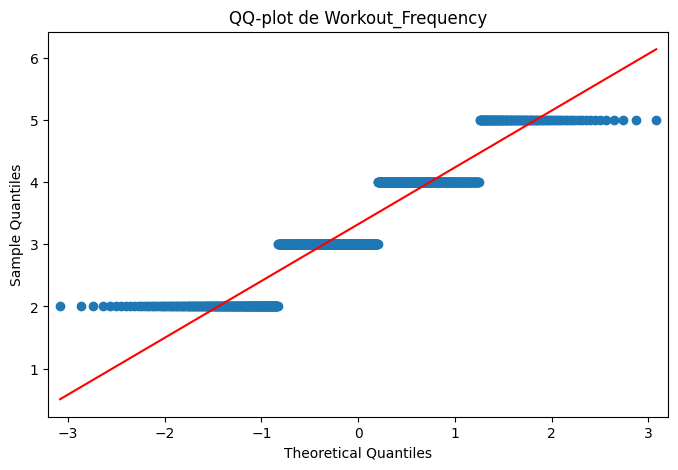


### Water_Intake_l ###


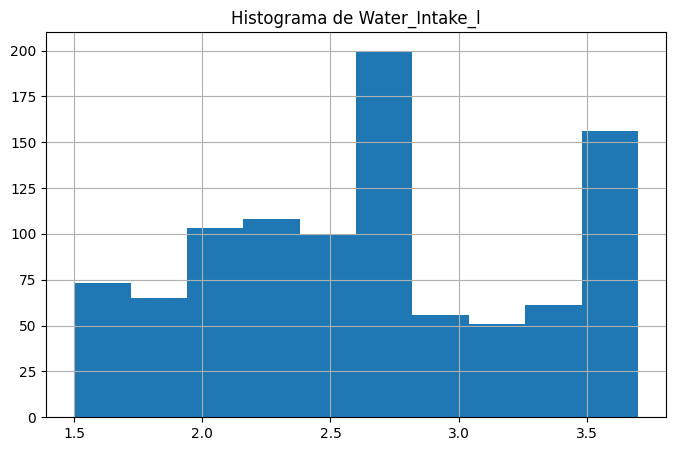

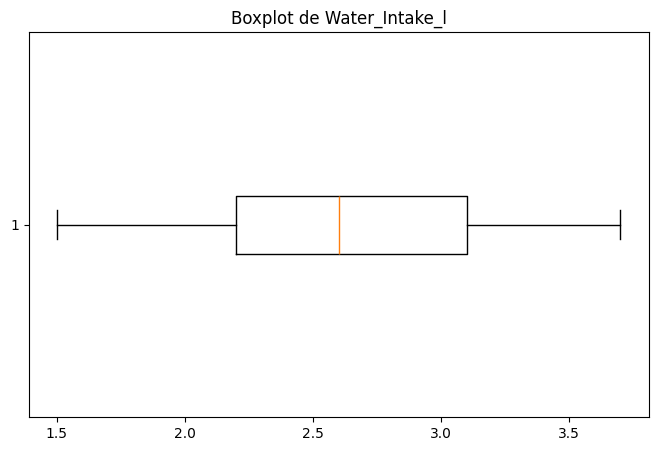

<Figure size 800x500 with 0 Axes>

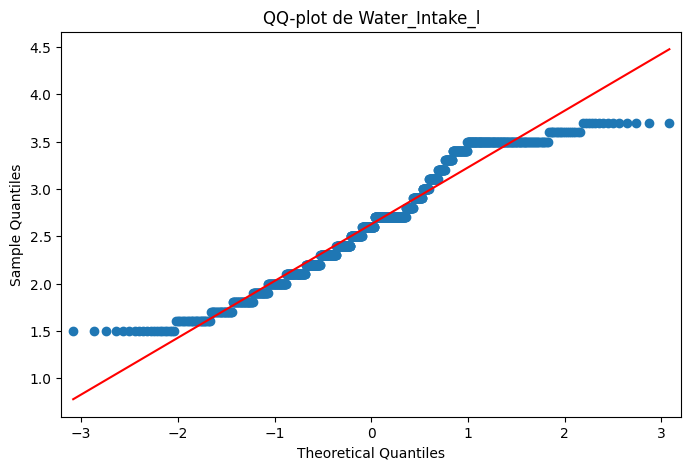

In [9]:
for col in data.columns:
    print(f"\n### {col} ###")

    # Histograma
    data[col].hist()
    plt.title(f"Histograma de {col}")
    plt.show()

    # Boxplot
    plt.figure()
    plt.boxplot(data[col], vert=False)
    plt.title(f"Boxplot de {col}")
    plt.show()

    # QQ-plot
    plt.figure()
    qqplot(data[col], line='s')
    plt.title(f"QQ-plot de {col}")
    plt.show()

In [5]:
df_corr = data.corr(method="pearson")
df_corr

,Age,BMI,Calories_Burned,Workout_Frequency,Water_Intake_l
Age,1.000000,-0.013691,-0.154679,0.008055,0.041528
BMI,-0.013691,1.000000,0.059761,0.001645,0.213697
Calories_Burned,-0.154679,0.059761,1.000000,0.576150,0.356931
Workout_Frequency,0.008055,0.001645,0.576150,1.000000,0.238563
Water_Intake_l,0.041528,0.213697,0.356931,0.238563,1.000000


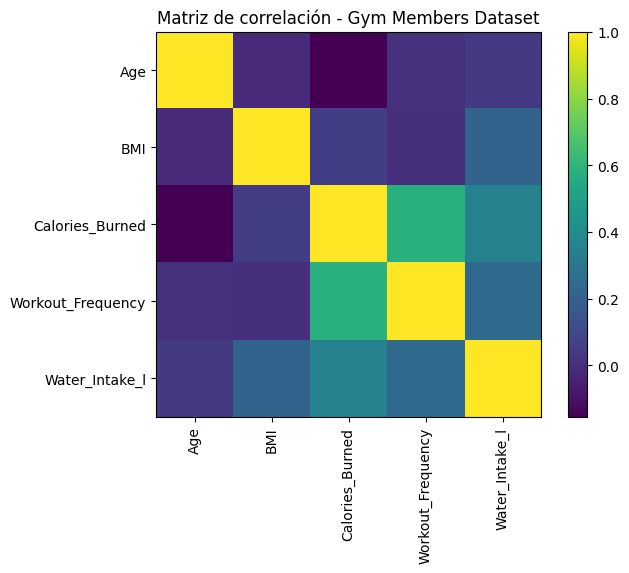

In [6]:
plt.figure(figsize=(7,5))
plt.imshow(df_corr, cmap='viridis')

plt.xticks(range(len(df_corr.columns)), df_corr.columns, rotation=90)
plt.yticks(range(len(df_corr.columns)), df_corr.columns)

plt.colorbar()
plt.title("Matriz de correlación - Gym Members Dataset")
plt.show()

In [7]:
x = data['Workout_Frequency']
y = data['Calories_Burned']

corr, p_val = pearsonr(x, y)

print(f"Coeficiente de correlación de Pearson: {corr}")
print(f"p-value: {p_val}")

Coeficiente de correlación de Pearson: 0.5761501254548654
p-value: 3.907233996679099e-87


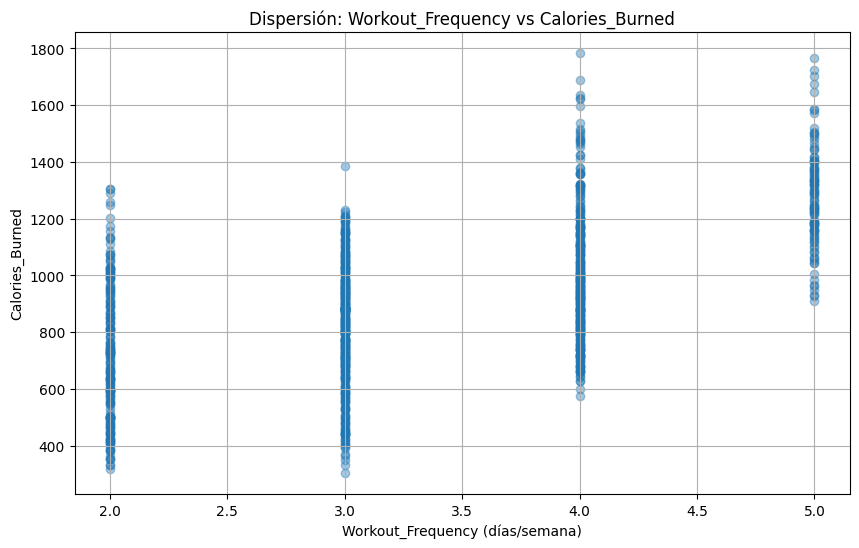

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(data['Workout_Frequency'], data['Calories_Burned'], alpha=0.4)
plt.title('Dispersión: Workout_Frequency vs Calories_Burned')
plt.xlabel('Workout_Frequency (días/semana)')
plt.ylabel('Calories_Burned')
plt.grid(True)
plt.show()